In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Loading

In [48]:
df=pd.read_csv('E:\\working_DATA\\carprice_pred.csv')

In [49]:
df.sample(4)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
57,58,3,mazda rx-7 gs,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,3.33,3.255,9.4,101,6000,17,23,13645.0
156,157,0,toyota mark ii,gas,std,four,sedan,fwd,front,95.7,...,98,2bbl,3.19,3.030,9.0,70,4800,30,37,6938.0
196,197,-2,volvo 244dl,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.150,9.5,114,5400,24,28,15985.0
114,115,0,peugeot 505s turbo diesel,diesel,turbo,four,wagon,rwd,front,114.2,...,152,idi,3.70,3.520,21.0,95,4150,25,25,17075.0


# Checking Missing Values

In [51]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# Checking Duplicates

In [53]:
df.duplicated().sum()

0

# Data Spliting in Independent variables and Target Variable

In [54]:
X=df[['fueltype','carbody','drivewheel','enginesize','horsepower','peakrpm','wheelbase']]
y=df['price']

In [55]:
X.head()

,fueltype,carbody,drivewheel,enginesize,horsepower,peakrpm,wheelbase
0,gas,convertible,rwd,130,111,5000,88.6
1,gas,convertible,rwd,130,111,5000,88.6
2,gas,hatchback,rwd,152,154,5000,94.5
3,gas,sedan,fwd,109,102,5500,99.8
4,gas,sedan,4wd,136,115,5500,99.4


# OneHot Encoding

In [56]:
X=pd.get_dummies(X,drop_first=True)

In [57]:
X.head()

,enginesize,horsepower,peakrpm,wheelbase,fueltype_gas,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd
0,130,111,5000,88.6,1,0,0,0,0,0,1
1,130,111,5000,88.6,1,0,0,0,0,0,1
2,152,154,5000,94.5,1,0,1,0,0,0,1
3,109,102,5500,99.8,1,0,0,1,0,1,0
4,136,115,5500,99.4,1,0,0,1,0,0,0


In [58]:
X.shape

(205, 11)

# Train Test Split

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [61]:
X_train.head()

,enginesize,horsepower,peakrpm,wheelbase,fueltype_gas,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd
66,134,72,4200,104.9,0,0,0,1,0,0,1
111,120,95,5000,107.9,1,0,0,1,0,0,1
153,92,62,4800,95.7,1,0,0,0,1,1,0
96,97,69,5200,94.5,1,0,0,1,0,1,0
38,110,86,5800,96.5,1,0,1,0,0,1,0


In [62]:
X_test.head()

,enginesize,horsepower,peakrpm,wheelbase,fueltype_gas,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd
15,209,182,5400,103.5,1,0,0,1,0,0,1
9,131,160,5500,99.5,1,0,1,0,0,0,0
100,120,97,5200,97.2,1,0,0,1,0,1,0
132,121,110,5250,99.1,1,0,1,0,0,1,0
68,183,123,4350,110.0,0,0,0,0,1,0,1


# Feature Scaling:-

# (a)Standard Sacling

In [63]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

In [64]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [65]:
X_train_scaled.head()

,enginesize,horsepower,peakrpm,wheelbase,fueltype_gas,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd
0,0.188010,-0.815386,-1.917829,1.037085,-3.151719,-0.177332,-0.720082,1.050031,-0.361987,-1.173376,1.266165
1,-0.158993,-0.241894,-0.292907,1.541231,0.317287,-0.177332,-0.720082,1.050031,-0.361987,-1.173376,1.266165
2,-0.852999,-1.064730,-0.699137,-0.508962,0.317287,-0.177332,-0.720082,-0.952353,2.762531,0.852242,-0.789786
3,-0.729070,-0.890189,0.113323,-0.710620,0.317287,-0.177332,-0.720082,1.050031,-0.361987,0.852242,-0.789786
4,-0.406852,-0.466304,1.332015,-0.374523,0.317287,-0.177332,1.388730,-0.952353,-0.361987,0.852242,-0.789786


In [66]:
X_test_scaled.head()

,enginesize,horsepower,peakrpm,wheelbase,fueltype_gas,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd
0,2.046956,1.927399,0.519554,0.801817,0.317287,-0.177332,-0.720082,1.050031,-0.361987,-1.173376,1.266165
1,0.113653,1.378842,0.722669,0.129623,0.317287,-0.177332,1.388730,-0.952353,-0.361987,-1.173376,-0.789786
2,-0.158993,-0.192025,0.113323,-0.256889,0.317287,-0.177332,-0.720082,1.050031,-0.361987,0.852242,-0.789786
3,-0.134207,0.132122,0.214881,0.062403,0.317287,-0.177332,1.388730,-0.952353,-0.361987,0.852242,-0.789786
4,1.402522,0.456269,-1.613156,1.894133,-3.151719,-0.177332,-0.720082,-0.952353,2.762531,-1.173376,1.266165


In [68]:
X_train.describe()

,enginesize,horsepower,peakrpm,wheelbase,fueltype_gas,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,126.414634,104.701220,5144.207317,98.728659,0.908537,0.030488,0.341463,0.475610,0.115854,0.579268,0.384146
std,40.469014,40.228058,493.839328,5.968884,0.289150,0.172452,0.475653,0.500934,0.321030,0.495189,0.487882
min,70.000000,52.000000,4150.000000,86.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,98.000000,71.500000,4800.000000,94.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,119.500000,95.000000,5200.000000,96.750000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,141.000000,116.000000,5500.000000,102.100000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,326.000000,288.000000,6600.000000,115.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [74]:
X_train_scaled.describe()

,enginesize,horsepower,peakrpm,wheelbase,fueltype_gas,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd
count,1.640000e+02,1.640000e+02,1.640000e+02,1.640000e+02,1.640000e+02,1.640000e+02,1.640000e+02,1.640000e+02,1.640000e+02,1.640000e+02,1.640000e+02
mean,-1.990278e-16,-3.384826e-17,-5.043391e-16,-8.692234e-16,-1.760110e-16,-7.311225e-17,-1.665335e-16,4.061792e-18,1.353931e-17,1.435166e-16,-1.123762e-16
std,1.003063e+00,1.003063e+00,1.003063e+00,1.003063e+00,1.003063e+00,1.003063e+00,1.003063e+00,1.003063e+00,1.003063e+00,1.003063e+00,1.003063e+00
min,-1.398290e+00,-1.314074e+00,-2.019386e+00,-2.038204e+00,-3.151719e+00,-1.773317e-01,-7.200823e-01,-9.523533e-01,-3.619869e-01,-1.173376e+00,-7.897863e-01
25%,-7.042836e-01,-8.278527e-01,-6.991374e-01,-7.106203e-01,3.172872e-01,-1.773317e-01,-7.200823e-01,-9.523533e-01,-3.619869e-01,-1.173376e+00,-7.897863e-01
50%,-1.713857e-01,-2.418942e-01,1.133234e-01,-3.325109e-01,3.172872e-01,-1.773317e-01,-7.200823e-01,-9.523533e-01,-3.619869e-01,8.522416e-01,-7.897863e-01
75%,3.615121e-01,2.817284e-01,7.226691e-01,5.665493e-01,3.172872e-01,-1.773317e-01,1.388730e+00,1.050031e+00,-3.619869e-01,8.522416e-01,1.266165e+00
max,4.946912e+00,4.570446e+00,2.956936e+00,2.835206e+00,3.172872e-01,5.639149e+00,1.388730e+00,1.050031e+00,2.762531e+00,8.522416e-01,1.266165e+00


# Checking IF there is any difference in before and after scaling

<AxesSubplot:xlabel='peakrpm', ylabel='Density'>

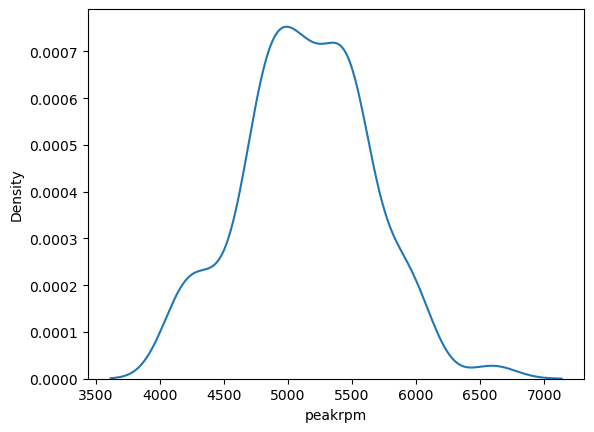

In [90]:
sns.kdeplot(X_train['peakrpm'])

<AxesSubplot:xlabel='peakrpm', ylabel='Density'>

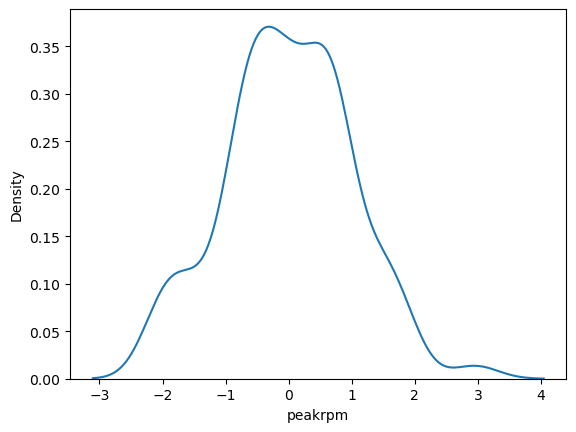

In [91]:
sns.kdeplot(X_train_scaled['peakrpm'])